In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [87]:
brain_data = pd.read_csv('brain_tumor_dataset.csv')

In [36]:
brain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tumor Type   1000 non-null   object 
 1   Location     1000 non-null   object 
 2   Size (cm)    1000 non-null   float64
 3   Grade        1000 non-null   object 
 4   Patient Age  1000 non-null   int64  
 5   Gender       1000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB


# What is the distribution of different tumor types in the dataset?

In [37]:
brain_data['Tumor Type'].value_counts().reset_index(name='Count')

,Tumor Type,Count
0,Glioblastoma,210
1,Oligodendroglioma,206
2,Ependymoma,204
3,Meningioma,190
4,Astrocytoma,190


# What is the age distribution of patients with brain tumors?

In [38]:
brain_data['Patient Age'].value_counts().reset_index(name='Count')

,Patient Age,Count
0,63,21
1,24,20
2,16,20
3,58,19
4,5,19
...,...,...
84,68,4
85,56,4
86,86,4
87,44,3


# Visualize the age distribution

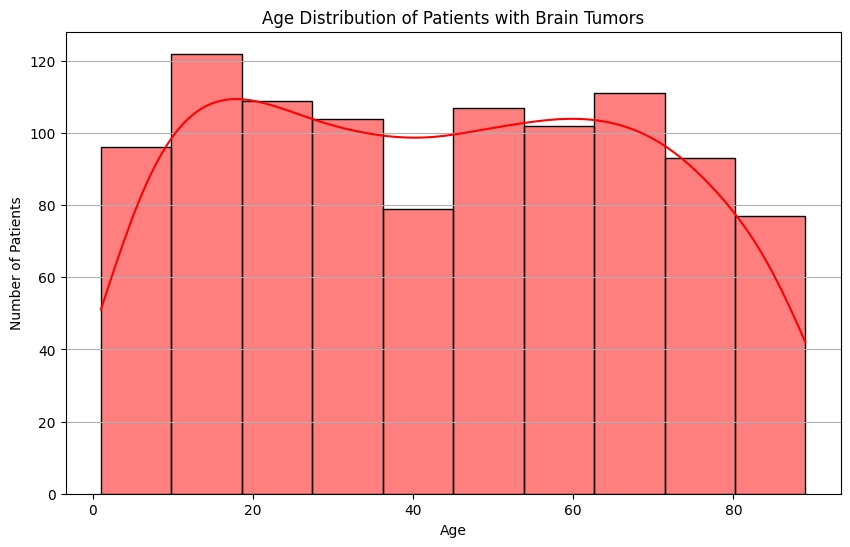

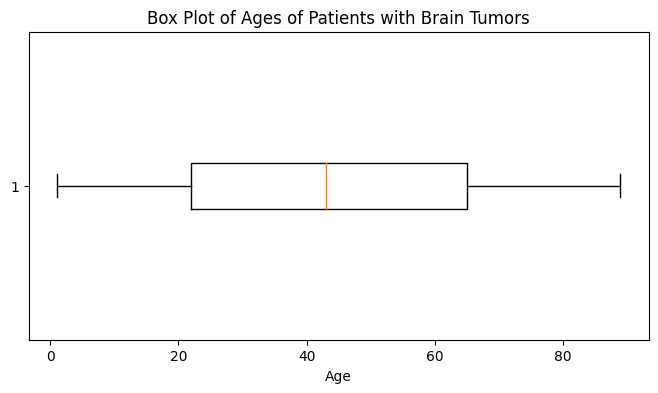

In [39]:
# Create a histogram
plt.figure(figsize=(10, 6))
# plt.hist(brain_data['Patient Age'], bins=20, color='skyblue', edgecolor='black')
sns.histplot(brain_data['Patient Age'], bins=10, kde=True, color='red')

plt.title('Age Distribution of Patients with Brain Tumors')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.grid(axis='y')
plt.show()

# Optionally, create a box plot
plt.figure(figsize=(8, 4))
plt.boxplot(brain_data['Patient Age'], vert=False)
plt.title('Box Plot of Ages of Patients with Brain Tumors')
plt.xlabel('Age')
plt.show()

# What is the average age of patients for each tumor type?

In [40]:
brain_data.groupby('Tumor Type')['Patient Age'].mean().reset_index(name='Mean')

,Tumor Type,Mean
0,Astrocytoma,42.536842
1,Ependymoma,44.509804
2,Glioblastoma,43.276190
3,Meningioma,44.078947
4,Oligodendroglioma,43.174757


# What is the gender distribution among patients?

In [41]:
brain_data['Gender'].value_counts().reset_index(name='Count')

,Gender,Count
0,Male,514
1,Female,486


# Visualize the gender distribution

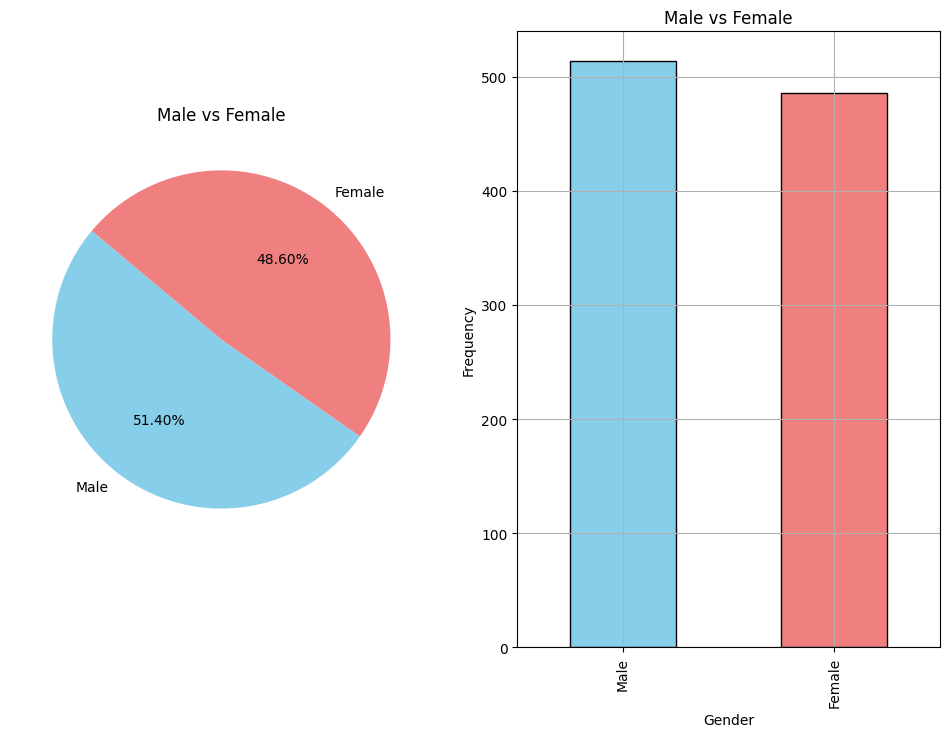

In [42]:
# Create a pie chart
fig,ax=plt.subplots(1,2, figsize=(12,8))

brain_data['Gender'].value_counts().plot(kind='pie', ax=ax[0], autopct ='%.2f%%', startangle=140, colors=['skyblue', 'lightcoral'])
ax[0].set_title('Male vs Female')
ax[0].set_ylabel('')

# create a bar chart
brain_data['Gender'].value_counts().plot(kind='bar', ax=ax[1], color=['skyblue', 'lightcoral'], edgecolor='black')
ax[1].set_title('Male vs Female')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Frequency')
ax[1].grid(True)

plt.show()

# Are there more male or female patients for each tumor type?

In [43]:
brain_data.groupby(['Tumor Type', 'Gender']).size()

Tumor Type         Gender
Astrocytoma        Female     93
                   Male       97
Ependymoma         Female     93
                   Male      111
Glioblastoma       Female    104
                   Male      106
Meningioma         Female     99
                   Male       91
Oligodendroglioma  Female     97
                   Male      109
dtype: int64

# What is the average tumor size for each tumor type?

In [44]:
brain_data.groupby('Tumor Type')['Size (cm)'].mean().reset_index(name='Mean')

,Tumor Type,Mean
0,Astrocytoma,5.150158
1,Ependymoma,5.108382
2,Glioblastoma,5.365857
3,Meningioma,5.387263
4,Oligodendroglioma,5.099272


# Visualize the distribution of Tumor Sizes Across Tumor Type

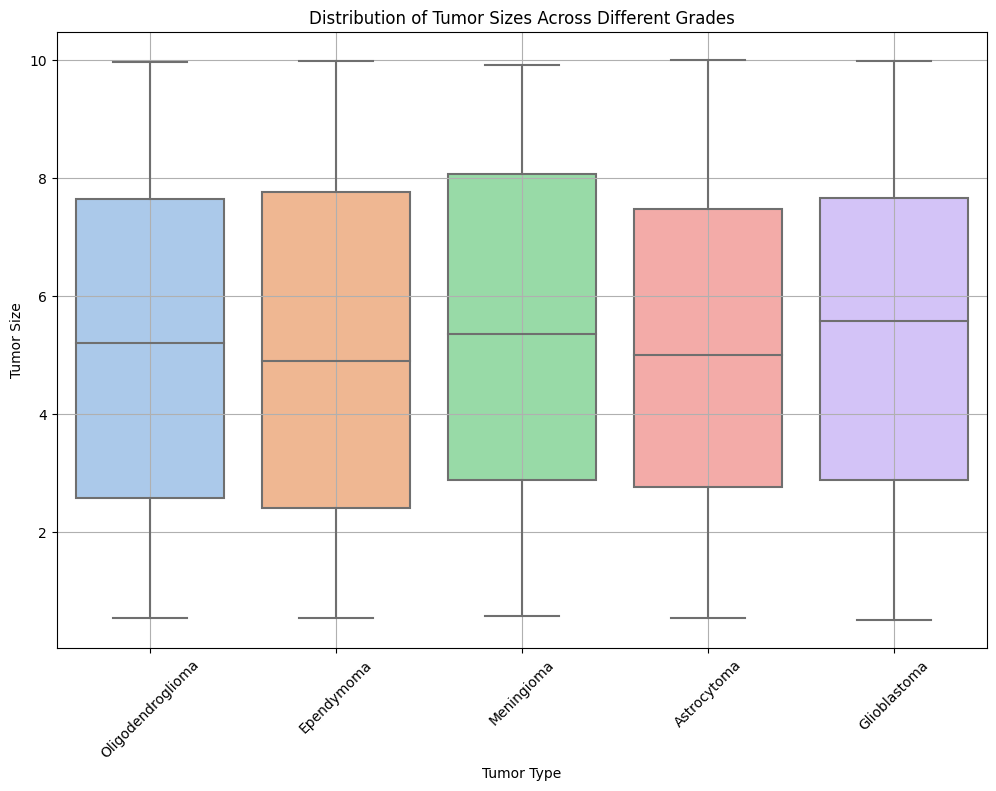

In [45]:
plt.figure(figsize=(12, 8))
# brain_data.boxplot(column='Size (cm)', by='Tumor Type', grid=False, color='skyblue', flierprops=dict(markerfacecolor='r', marker='o'))
sns.boxplot(x='Tumor Type', y='Size (cm)', data=brain_data, palette='pastel')

plt.title('Distribution of Tumor Sizes Across Different Grades')
plt.suptitle('')  # Remove the default title to avoid duplication
plt.xlabel('Tumor Type')
plt.ylabel('Tumor Size')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# What is the distribution of tumor sizes across different grades?

In [46]:
brain_data.groupby('Grade')['Size (cm)'].describe()

,count,mean,std,min,25%,50%,75%,max
Grade,,,,,,,,
I,264.0,5.207083,2.774117,0.58,2.7700,5.265,7.6500,9.97
II,236.0,5.032034,2.847108,0.58,2.5700,5.105,7.4825,10.00
III,244.0,5.302582,2.874117,0.51,2.8425,5.235,8.1025,9.97
IV,256.0,5.333750,2.825772,0.51,2.7850,5.490,7.7100,9.98


#  Visualize the distribution of Tumor Sizes Across Different Grades

<Figure size 1200x800 with 0 Axes>

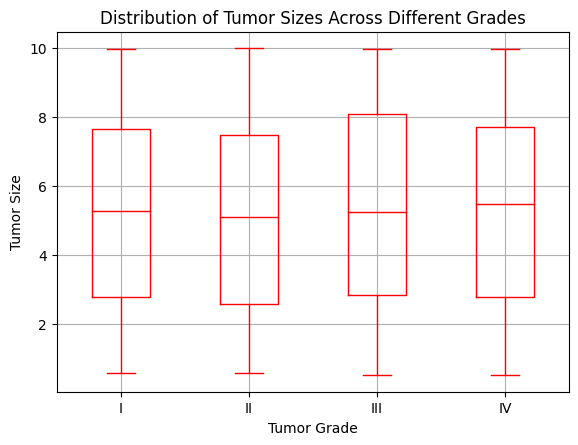

In [47]:
plt.figure(figsize=(12, 8))
brain_data.boxplot(column='Size (cm)', by='Grade', grid=False, color='red', flierprops=dict(markerfacecolor='r', marker='o'))
plt.title('Distribution of Tumor Sizes Across Different Grades')
plt.suptitle('')  # Remove the default title to avoid duplication
plt.xlabel('Tumor Grade')
plt.ylabel('Tumor Size')
plt.grid(True)
plt.show()

# How are tumor types distributed across different grades?

In [48]:
pd.crosstab(brain_data['Grade'], brain_data['Tumor Type']).reset_index()

Tumor Type,Grade,Astrocytoma,Ependymoma,Glioblastoma,Meningioma,Oligodendroglioma
0,I,41,65,58,49,51
1,II,44,49,48,52,43
2,III,55,47,41,42,59
3,IV,50,43,63,47,53


# Which tumor types are more likely to be high-grade?

In [49]:
# Step 1: Filter the data for high-grade (Grade IV) tumors
high_grade_tumors = brain_data[brain_data['Grade'] == 'IV']

# Step 2: Count the occurrences of each tumor type in Grade IV
high_grade_distribution = high_grade_tumors['Tumor Type'].value_counts()
most_likely_high_grade_tumor = high_grade_distribution.idxmax()
count_most_likely_high_grade_tumor = high_grade_distribution.max()

# Display the counts and proportions
print("Counts of Tumor Types in Grade IV:\n", most_likely_high_grade_tumor, count_most_likely_high_grade_tumor)



Counts of Tumor Types in Grade IV:
 Glioblastoma 63


# Visualize of Size (cm) 


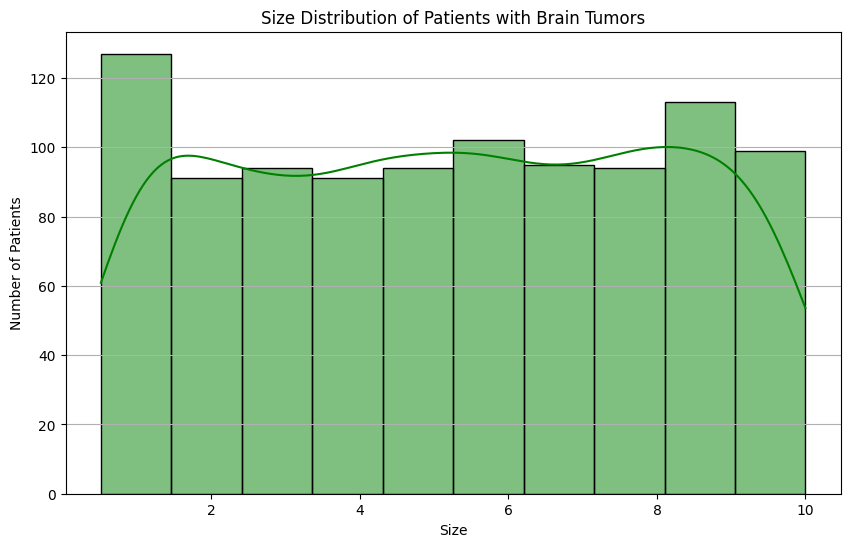

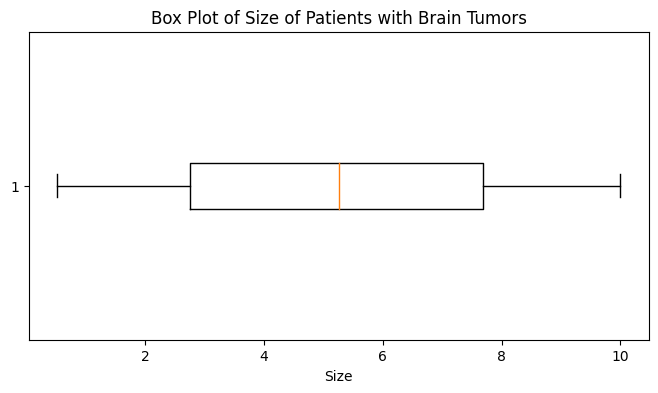

In [50]:
# Create a histogram
plt.figure(figsize=(10, 6))
# plt.hist(brain_data['Patient Age'], bins=20, color='skyblue', edgecolor='black')
sns.histplot(brain_data['Size (cm)'], bins=10, kde=True, color='green')

plt.title('Size Distribution of Patients with Brain Tumors')
plt.xlabel('Size')
plt.ylabel('Number of Patients')
plt.grid(axis='y')
plt.show()

# Optionally, create a box plot
plt.figure(figsize=(8, 4))
plt.boxplot(brain_data['Size (cm)'], vert=False)
plt.title('Box Plot of Size of Patients with Brain Tumors')
plt.xlabel('Size')
plt.show()

# Visualize of Location 

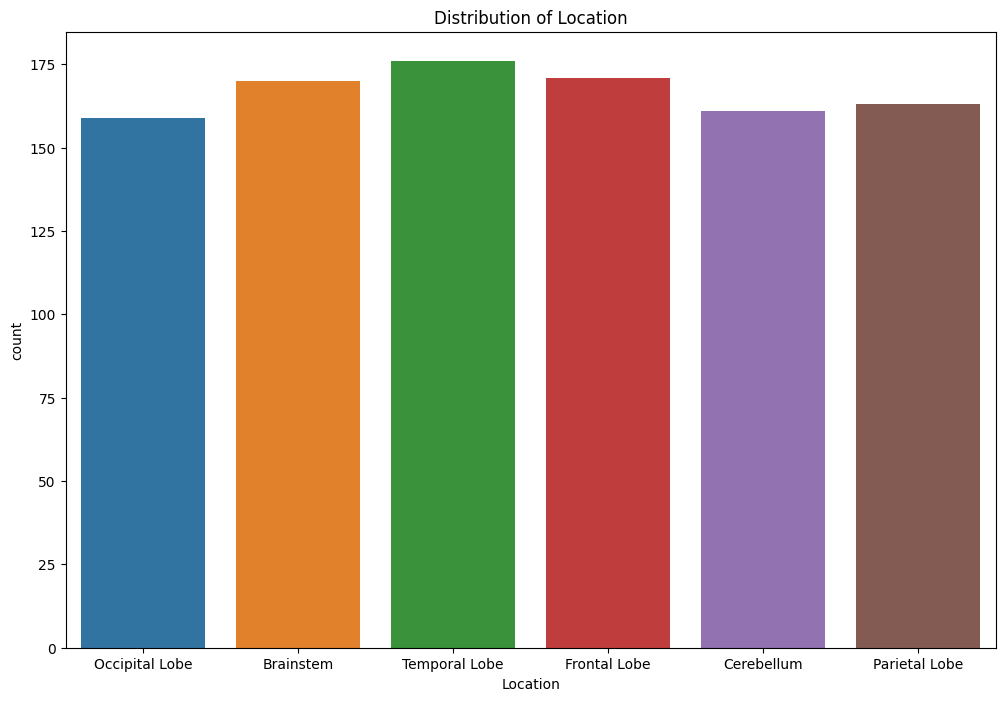

In [51]:
plt.figure(figsize=(12, 8))
sns.countplot(x=brain_data['Location'])
plt.title('Distribution of Location')
plt.show()

# Distribution of Gender Across Tumor Type¶

In [52]:
pd.crosstab(brain_data['Gender'], brain_data['Tumor Type']).reset_index()

Tumor Type,Gender,Astrocytoma,Ependymoma,Glioblastoma,Meningioma,Oligodendroglioma
0,Female,93,93,104,99,97
1,Male,97,111,106,91,109


# Location distribution of each tumor type

In [53]:
pd.crosstab(brain_data['Location'], brain_data['Tumor Type']).reset_index()

Tumor Type,Location,Astrocytoma,Ependymoma,Glioblastoma,Meningioma,Oligodendroglioma
0,Brainstem,29,35,38,34,34
1,Cerebellum,31,25,30,29,46
2,Frontal Lobe,38,38,36,26,33
3,Occipital Lobe,30,35,38,37,19
4,Parietal Lobe,32,35,36,25,35
5,Temporal Lobe,30,36,32,39,39


# Visualize Location Distribution of Tumor Type

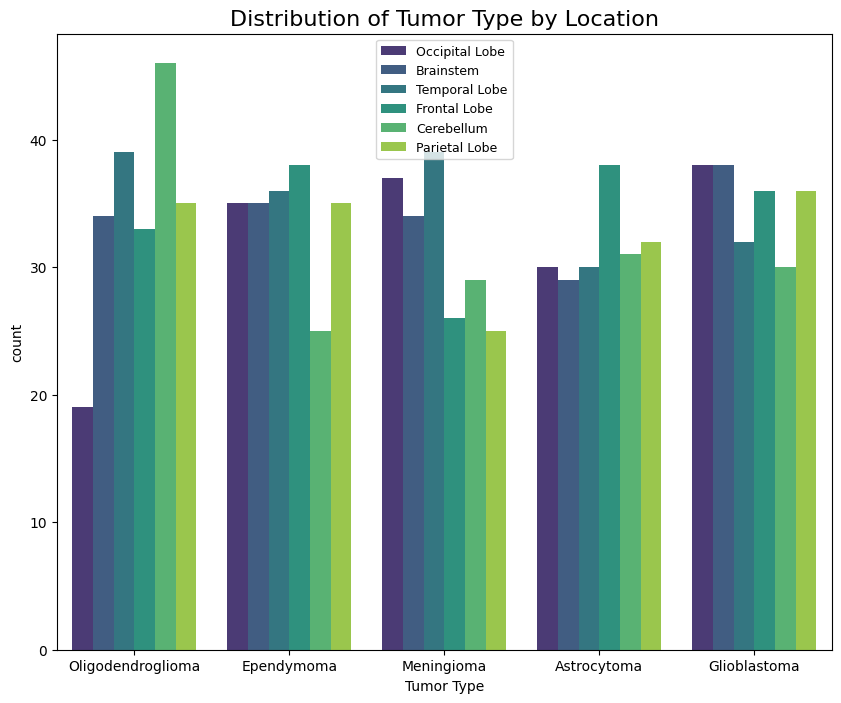

In [54]:
plt.rcParams['font.family'] = 'Times New Roman'

# Define the color palette you want
color_palette = 'viridis'  # You can use any seaborn color palette or a list of colors

plt.figure(figsize=(10, 8))
sns.countplot(x='Tumor Type', hue='Location', data=brain_data, palette=color_palette)
plt.title('Distribution of Tumor Type by Location', fontsize=16)
plt.legend(fontsize=9, loc='upper center')
plt.show()

# Correlation Matrix between patient age and tumor size

In [55]:
Correlation = brain_data[['Patient Age', 'Size (cm)']].corr()
Correlation

,Patient Age,Size (cm)
Patient Age,1.000000,-0.004661
Size (cm),-0.004661,1.000000


# Visualize the correlation matrix using a heatmap

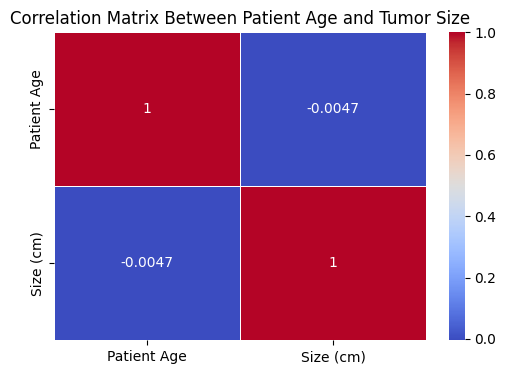

In [56]:
plt.figure(figsize=(6, 4))
sns.heatmap(Correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Between Patient Age and Tumor Size')
plt.show()

# cluster patients based on tumor characteristics to identify similar patient groups?

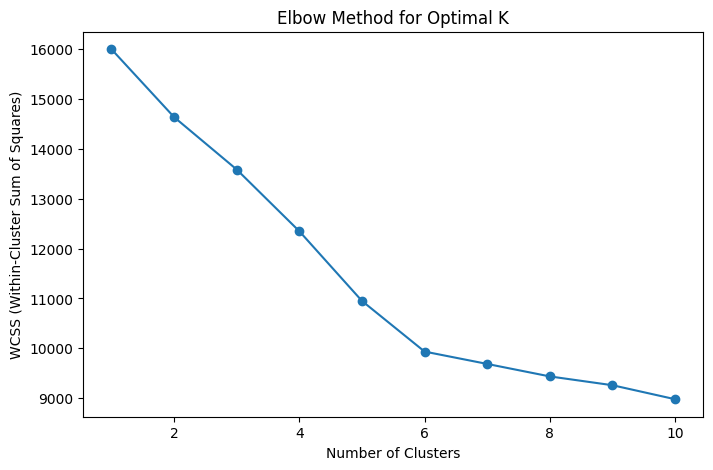

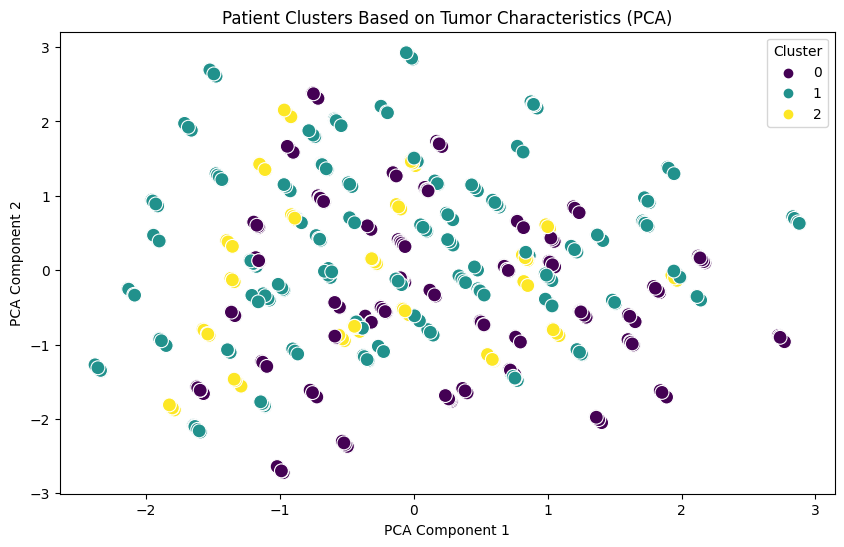

In [58]:
# Step 1: Load and prepare the data
# Assuming your data is in a DataFrame named 'brain_data'
features = brain_data[['Size (cm)', 'Tumor Type', 'Location', 'Grade']]

# Step 2: Encode categorical variables (Tumor Type, Location, Grade)
encoder = OneHotEncoder()
features_encoded = encoder.fit_transform(features[['Tumor Type', 'Location', 'Grade']]).toarray()

# Combine encoded features with 'Size (cm)'
features_combined = np.hstack([features_encoded, features[['Size (cm)']].values])

# Step 3: Normalize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_combined)

# Step 4: Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Step 5: Apply K-Means with the optimal number of clusters
optimal_k = 3  # Assuming 3 clusters from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add the cluster labels to the original data
brain_data['Cluster'] = clusters

# Step 6: Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=brain_data['Cluster'], palette='viridis', s=100)
plt.title('Patient Clusters Based on Tumor Characteristics (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()
